# **NETFLIX ANALYSIS**

**SETTING UP THE DATASET**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
nt = pd.read_csv('netflix.csv')
nt.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**DATA CLEANING AND TRANSFORMATION**

1. Is there any missing data? Deal with them accordingly?

In [3]:
nt.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
nt = nt.drop(['director', 'cast'], axis=1)

In [5]:
nt = nt.dropna()
nt.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

2. Using the 'date_added' column a new column called 'year_added' that only has the year the title was added.

In [6]:
nt['date_added']

0       September 25, 2021
1       September 24, 2021
4       September 24, 2021
7       September 24, 2021
8       September 24, 2021
               ...        
8801         March 9, 2016
8802     November 20, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 7961, dtype: object

In [7]:
nt['date_added'] = pd.to_datetime(nt['date_added'])
nt['date_added']

0      2021-09-25
1      2021-09-24
4      2021-09-24
7      2021-09-24
8      2021-09-24
          ...    
8801   2016-03-09
8802   2019-11-20
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 7961, dtype: datetime64[ns]

In [8]:
nt['year_added'] = nt['date_added'].dt.year
nt['year_added']

0       2021
1       2021
4       2021
7       2021
8       2021
        ... 
8801    2016
8802    2019
8804    2019
8805    2020
8806    2019
Name: year_added, Length: 7961, dtype: int64

3. Using the 'date_added' column a new column called 'month_added' that only has the month the title was added.

In [9]:
nt['month_added'] = nt['date_added'].dt.month
nt['month_added']

0        9
1        9
4        9
7        9
8        9
        ..
8801     3
8802    11
8804    11
8805     1
8806     3
Name: month_added, Length: 7961, dtype: int64

4. Check the data types. Anything look odd? Adjust accordingly

In [10]:
nt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7961 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7961 non-null   object        
 1   type          7961 non-null   object        
 2   title         7961 non-null   object        
 3   country       7961 non-null   object        
 4   date_added    7961 non-null   datetime64[ns]
 5   release_year  7961 non-null   int64         
 6   rating        7961 non-null   object        
 7   duration      7961 non-null   object        
 8   listed_in     7961 non-null   object        
 9   description   7961 non-null   object        
 10  year_added    7961 non-null   int64         
 11  month_added   7961 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 808.5+ KB


**DATA VISUALISATION**

5. What is the most popular release year for movies on Netflix?

In [11]:
release_year_pivot = nt[nt.type == 'Movie'].pivot_table(index='release_year', values='show_id', aggfunc='count')
top5_release_year = release_year_pivot.sort_values(by='show_id', ascending=False)
top5_release_year.head(5)

,show_id
release_year,
2017,729
2018,713
2016,638
2019,565
2020,461


<Figure size 1440x1296 with 0 Axes>

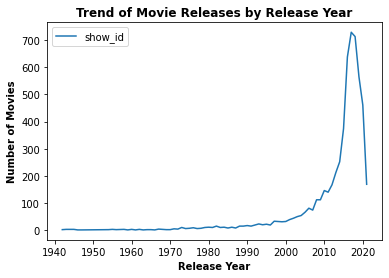

In [12]:
sorted_release = release_year_pivot.sort_values(by='release_year')
plt.figure(figsize=(20,18))
sorted_release.plot(kind='line')

plt.xlabel('Release Year', weight='bold')
plt.ylabel('Number of Movies', weight='bold')
plt.title('Trend of Movie Releases by Release Year', weight='bold')
plt.show()

6. What year did Netflix add the most content to its platform?

In [13]:
year_added = nt.pivot_table(index='year_added', values='show_id', aggfunc='count')
top5_year_added = year_added.sort_values(by='show_id', ascending=False)
top5_year_added.head()

,show_id
year_added,
2019,1858
2020,1771
2018,1529
2021,1140
2017,1121


Text(0.5, 1.0, 'Trend of content added on Netflix by Year Added')

<Figure size 1440x1296 with 0 Axes>

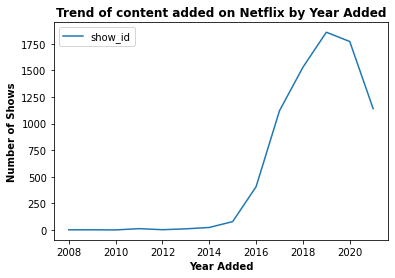

In [14]:
sorted_year_added = year_added.sort_values(by='year_added')
plt.figure(figsize=(20,18))
sorted_year_added.plot(kind='line')

plt.xlabel('Year Added', weight='bold')
plt.ylabel('Number of Shows', weight='bold')
plt.title('Trend of content added on Netflix by Year Added', weight='bold')

7. What is the movie with the longest title in the dataset?

In [15]:
movies = nt[nt['type'] == 'Movie']
movies['name_length'] = movies['title'].str.len()

C:\Users\USER\AppData\Local\Temp\ipykernel_10764\3500375024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['name_length'] = movies['title'].str.len()


In [16]:
movie_title_length = movies.pivot_table(index='title', values='name_length')
sorted_title_length = movie_title_length.sort_values(by='name_length', ascending=False)
sorted_title_length.head(5)

,name_length
title,
"Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton",104
The Power of Grayskull: The Definitive History of He-Man and the Masters of the Universe,88
Mike Birbiglia: What I Should Have Said Was Nothing: Tales from My Secret Public Journal,88
Steve Martin and Martin Short: An Evening You Will Forget for the Rest of Your Life,83
"Power Rangers Samurai: Christmas Together, Friends Forever (Christmas Special)",78


8. What are the top 5 most popular movies genres?

In [17]:
genre_pivot = movies.pivot_table(index='listed_in', values='show_id', aggfunc='count')
sorted_genre_pivot = genre_pivot.sort_values(by='show_id', ascending=False)
top5_genre = sorted_genre_pivot.head(5)
top5_genre

,show_id
listed_in,
Documentaries,343
"Dramas, International Movies",337
Stand-Up Comedy,303
"Comedies, Dramas, International Movies",260
"Dramas, Independent Movies, International Movies",243


<Figure size 1440x1296 with 0 Axes>

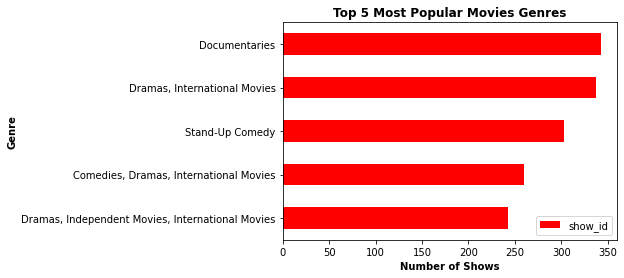

In [18]:
top5_genre = top5_genre[::-1]
plt.figure(figsize=(20,18))
top5_genre.plot(kind='barh', color='red')

plt.xlabel('Number of Shows', weight='bold')
plt.ylabel('Genre', weight='bold')
plt.title('Top 5 Most Popular Movies Genres', weight='bold')
plt.show()

9. Create a pie chart visualizing the proportion of movies vs TV shows. Label each section with the percentage.

In [19]:
content_type = nt['type'].value_counts()
content_type

Movie      5687
TV Show    2274
Name: type, dtype: int64

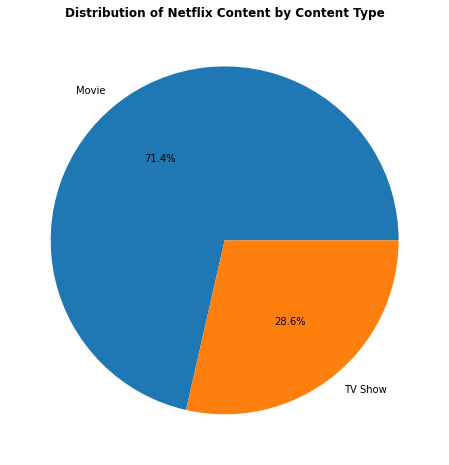

In [20]:
fig = plt.figure(figsize=(10,8))
plt.pie(content_type, labels=content_type.index, autopct='%1.1f%%')
plt.title('Distribution of Netflix Content by Content Type', weight='bold')
plt.show()